In [1]:
# Cancer Prediction using Random Forest Classifier
# Complete Implementation in a Jupyter Notebook

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

## 1. Data Loading and Exploration

Let's start by loading the Breast Cancer Wisconsin dataset. This is a well-known dataset for binary classification (malignant vs. benign).

In [2]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target')

In [3]:
# Get a basic overview of the dataset
print(f"Dataset dimensions: {X.shape}")
print(f"\nFeature names:\n{', '.join(cancer.feature_names)}")
print(f"\nTarget names: {cancer.target_names}")

Dataset dimensions: (569, 30)

Feature names:
mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension

Target names: ['malignant' 'benign']


In [4]:
# Display the first few rows of the dataset
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Basic statistics of features
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Class Distribution

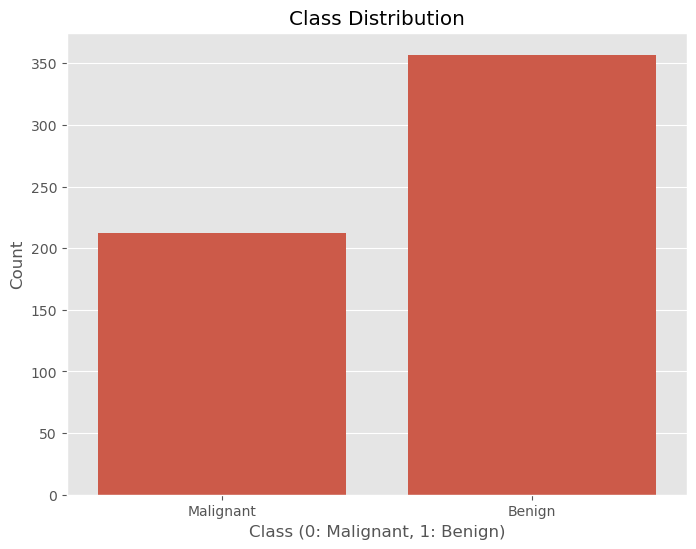

Class counts:
target
1    357
0    212
Name: count, dtype: int64
Class distribution (%):
target
1    62.741652
0    37.258348
Name: proportion, dtype: float64


In [6]:
# Check class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.show()

print(f"Class counts:\n{y.value_counts()}")
print(f"Class distribution (%):\n{y.value_counts(normalize=True) * 100}")

### Feature Analysis

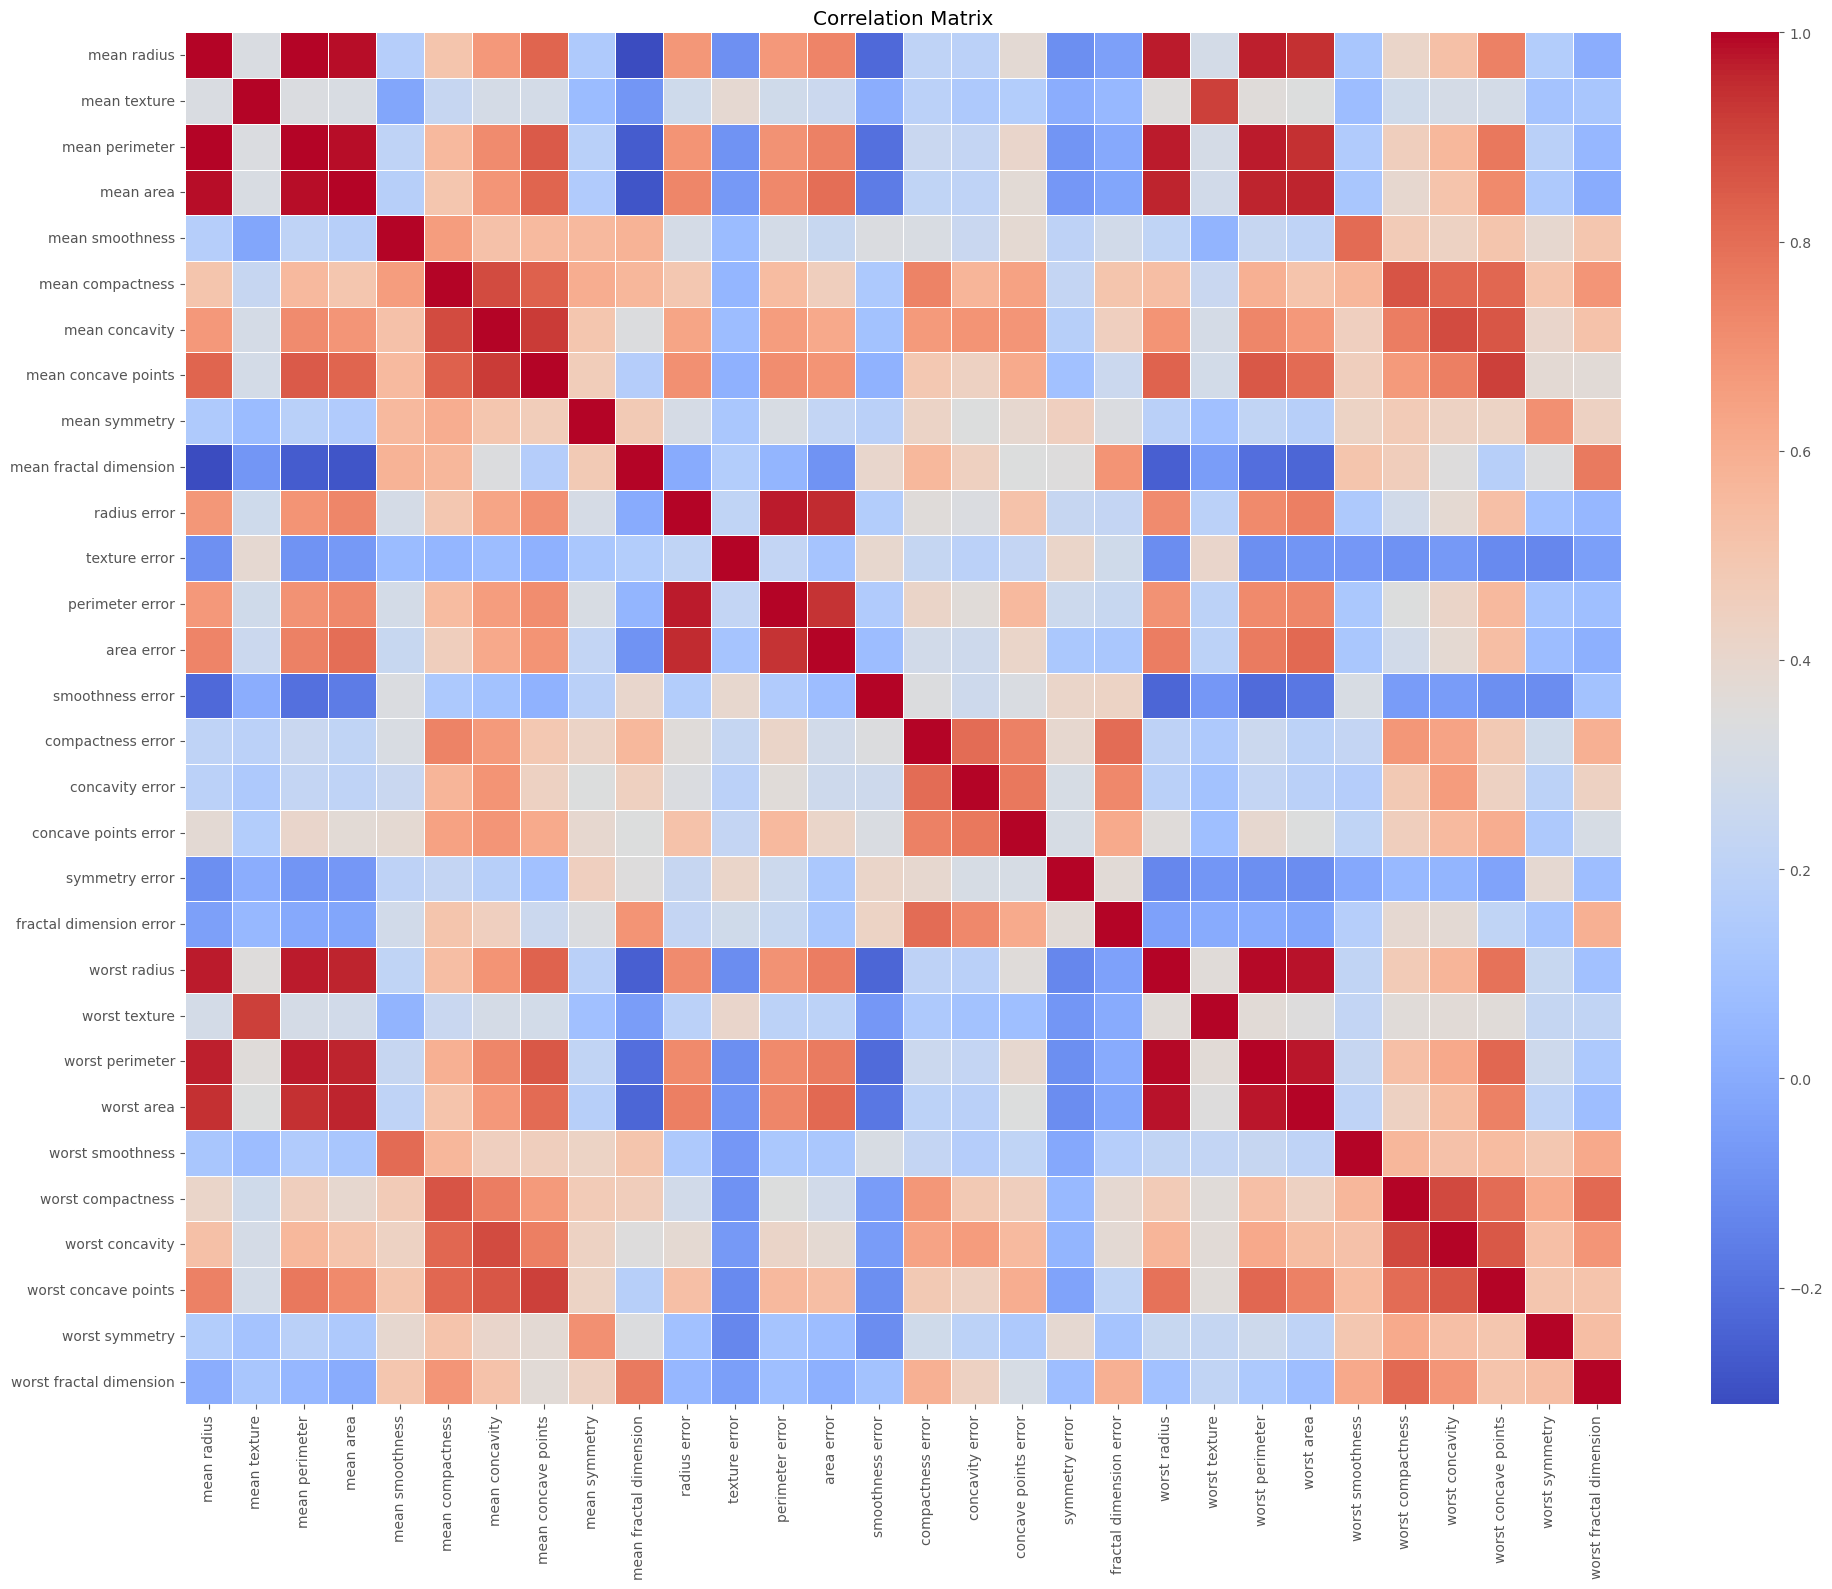

In [7]:
# Correlation matrix
plt.figure(figsize=(20, 16))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

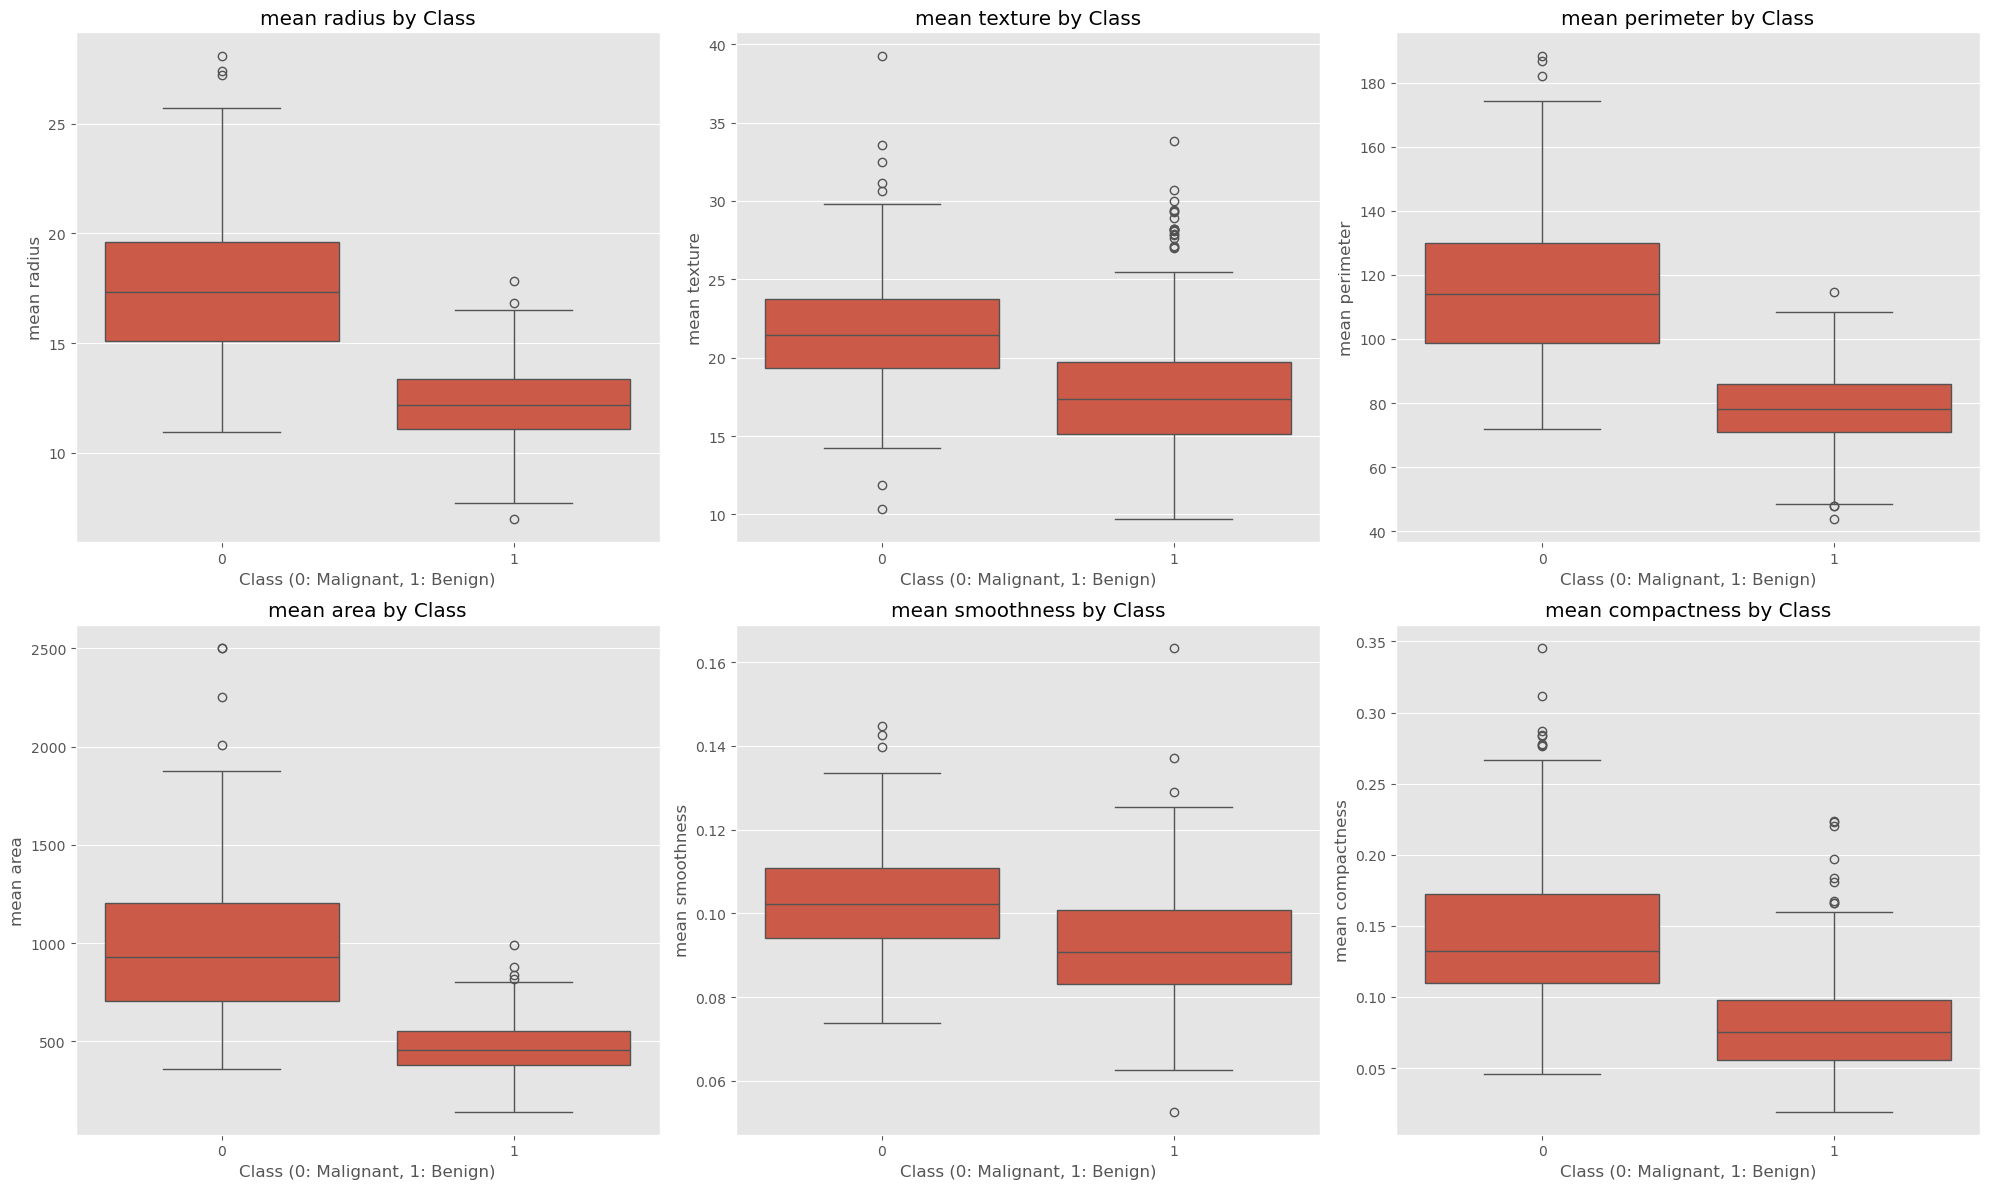

In [8]:
# Distribution of a few key features by class
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.boxplot(x=y, y=X[feature], ax=axes[i])
    axes[i].set_title(f'{feature} by Class')
    axes[i].set_xlabel('Class (0: Malignant, 1: Benign)')
    
plt.tight_layout()
plt.show()

## 2. Data Preprocessing

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (426, 30)
Testing set shape: (143, 30)


In [10]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for easier manipulation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## 3. Model Training: Random Forest Classifier

In [11]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [12]:
# Perform a simple cross-validation to get a baseline performance
cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validation accuracy: 0.9601 ± 0.0206


In [13]:
# Hyperparameter tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [14]:
# Get the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.9648


In [15]:
# Train the model with the best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

## 4. Model Evaluation

In [16]:
# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test_scaled)
y_pred_proba = best_rf_classifier.predict_proba(X_test_scaled)[:, 1]

In [17]:
# Calculate common evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9580
Precision: 0.9565
Recall: 0.9778
F1 Score: 0.9670


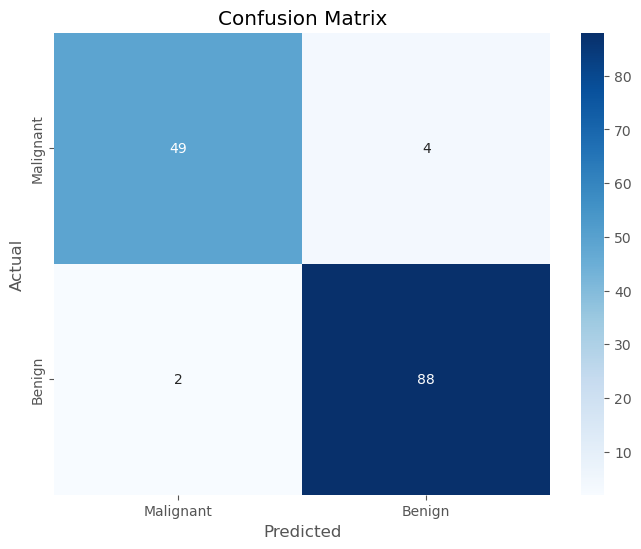

In [18]:
# Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.96      0.92      0.94        53
      Benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



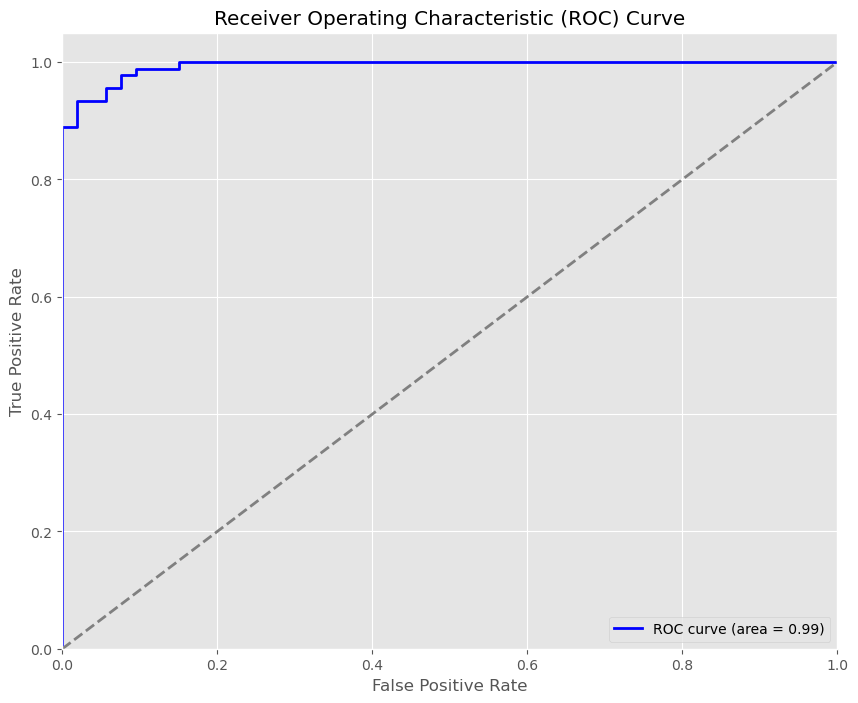

In [20]:
# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 5. Feature Importance Analysis

In [21]:
# Get feature importances from the model
feature_importances = best_rf_classifier.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

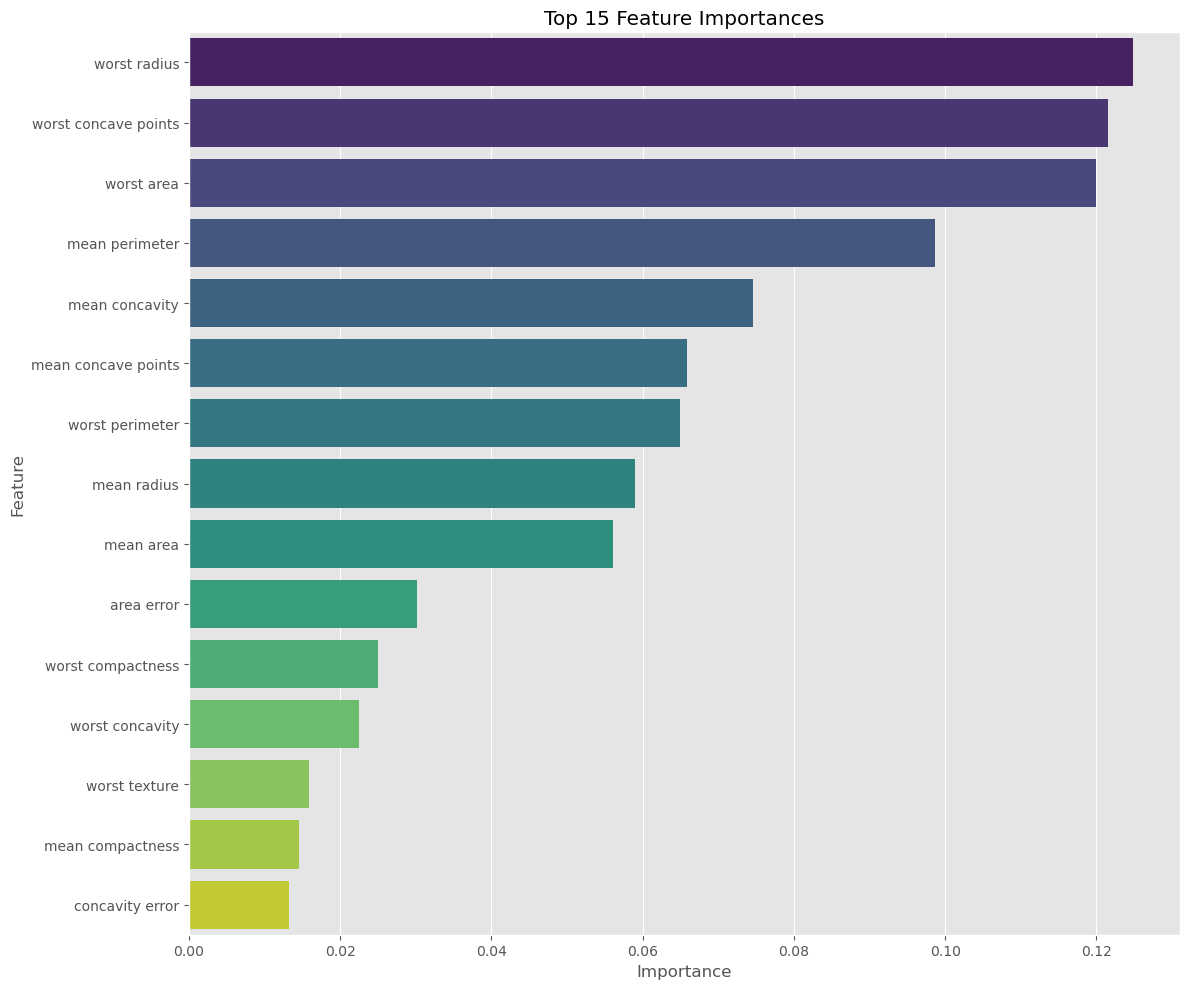

In [22]:
# Plot feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

In [23]:
# Calculate permutation importance for more robust feature importance
result = permutation_importance(
    best_rf_classifier, X_test_scaled, y_test, 
    n_repeats=10, random_state=42, n_jobs=-1
)

perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values('Importance', ascending=False)

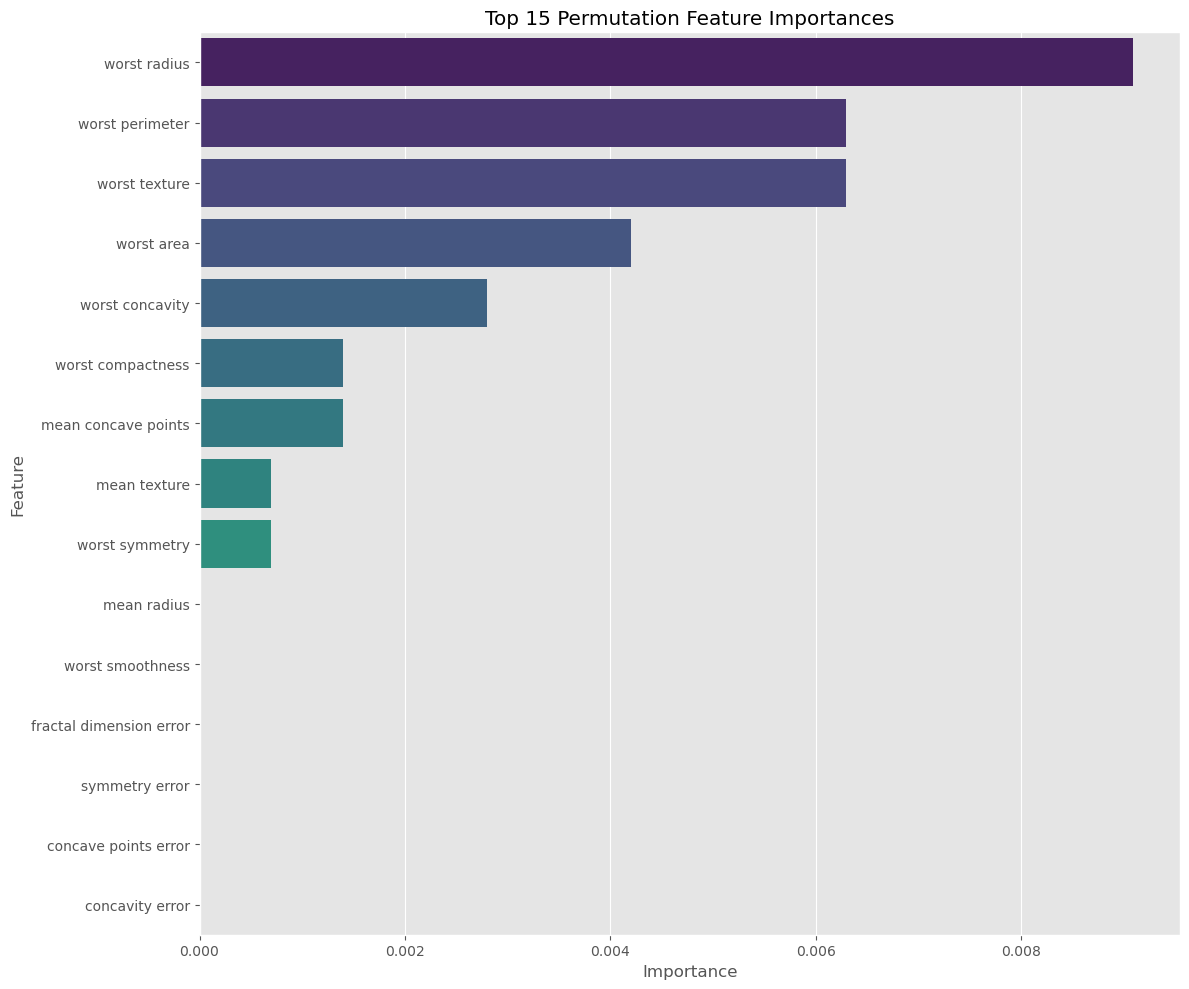

In [24]:
# Plot permutation importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df.head(15), palette='viridis')
plt.title('Top 15 Permutation Feature Importances')
plt.tight_layout()
plt.show()

## 6. Learning Curve Analysis

Let's check how the model performs with different training set sizes.

In [25]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_classifier, X_train_scaled, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy'
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

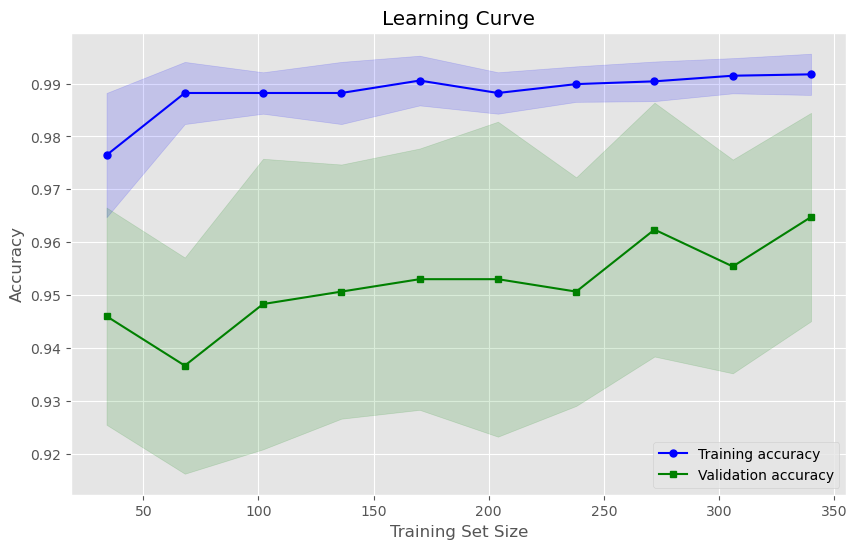

In [26]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## 7. Prediction Function for New Data

In [27]:
def predict_cancer(patient_data, model, scaler):
    """
    Make a cancer prediction for new patient data.
    
    Parameters:
    -----------
    patient_data : pandas DataFrame
        Patient features in the same format as the training data
    model : trained model
        The trained Random Forest model
    scaler : StandardScaler
        The scaler used to preprocess the training data
    
    Returns:
    --------
    prediction : int
        0 for Malignant, 1 for Benign
    probability : float
        Probability of the positive class (Benign)
    """
    # Ensure all required features are present
    missing_features = set(X.columns) - set(patient_data.columns)
    if missing_features:
        raise ValueError(f"Missing features: {missing_features}")
    
    # Select and order features to match training data
    patient_data = patient_data[X.columns]
    
    # Scale the data
    patient_data_scaled = scaler.transform(patient_data)
    
    # Make prediction
    prediction = model.predict(patient_data_scaled)[0]
    probability = model.predict_proba(patient_data_scaled)[0, 1]
    
    return prediction, probability

In [28]:
# Example of using the prediction function with sample data
# In a real application, this would be replaced with actual patient data

# Create sample patient data (using the mean of benign cases as an example)
sample_data = X[y == 1].mean().to_frame().T

# Make prediction
prediction, probability = predict_cancer(sample_data, best_rf_classifier, scaler)

print(f"Prediction: {'Benign' if prediction == 1 else 'Malignant'}")
print(f"Probability of being benign: {probability:.4f}")

Prediction: Benign
Probability of being benign: 1.0000


In [29]:
sample_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.22038,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.51507,87.005938,558.89944,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [30]:
sample_data.to_csv("sample_patient_data.csv", index=False)

## 8. Conclusion and Model Saving

In [31]:
# Summarize model performance
print("Model Performance Summary:")
print("-" * 30)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("-" * 30)
print("Top 5 Important Features:")
for idx, row in importance_df.head(5).iterrows():
    print(f"  - {row['Feature']}: {row['Importance']:.4f}")

Model Performance Summary:
------------------------------
Accuracy: 0.9580
Precision: 0.9565
Recall: 0.9778
F1 Score: 0.9670
ROC AUC: 0.9935
------------------------------
Top 5 Important Features:
  - worst radius: 0.1248
  - worst concave points: 0.1216
  - worst area: 0.1200
  - mean perimeter: 0.0986
  - mean concavity: 0.0746


In [32]:
# Save the model and scaler for future use
import joblib

model_info = {
    'model': best_rf_classifier,
    'scaler': scaler,
    'feature_names': list(X.columns),
    'training_accuracy': accuracy,
    'cross_val_score': grid_search.best_score_
}

joblib.dump(model_info, 'cancer_prediction_model.joblib')
print("Model saved successfully to 'cancer_prediction_model.joblib'")

Model saved successfully to 'cancer_prediction_model.joblib'


In [33]:
# Example of loading the model
loaded_model_info = joblib.load('cancer_prediction_model.joblib')
loaded_model = loaded_model_info['model']
loaded_scaler = loaded_model_info['scaler']
print("Model loaded successfully!")

Model loaded successfully!


In [34]:
import joblib

# Assuming your trained model is stored in a variable named "trained_model"
joblib.dump(best_rf_classifier, "cancer_prediction_model.joblib")

print("✅ Model saved successfully as 'cancer_prediction_model.joblib'")

✅ Model saved successfully as 'cancer_prediction_model.joblib'


In [35]:
import joblib

model = joblib.load("cancer_prediction_model.joblib")

print("Loaded Model Type:", type(model))  # This should NOT be <class 'dict'>

if hasattr(model, "predict"):
    print("✅ Model is correctly loaded and ready for predictions!")
else:
    print("❌ Error: Model does not have a 'predict' function. Check the saving step.")


Loaded Model Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
✅ Model is correctly loaded and ready for predictions!


In [36]:
print("Number of features used in training:", X_train.shape[1])  # X_train is your training data


Number of features used in training: 30
